# 이원분산분석(Two-way ANOVA)


##1.이원분산분석(Two-way ANOVA)

* 독립변인(범주형)의 수가 두개 일때 집단 간 종속변수(연속형)의 평균 차이가 유의한지를 검증하는 데 사용
* 상호작용효과(Interaction effect) 즉, 한 독립변수의 변화가 결과에 미치는 영향이 다른 독립변수의 수준에 따라 달라지는지를 확인하기 위해 사용됨.
* statsmodels 라이브러리 사용


##2.태아의 머리 둘레 측정데이터

* 태아의 머리 둘레 측정 데이터입니다.
* 4명의 관측자가 3명의 태아를 대상으로 측정을 했습니다. 이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사하였습니다


In [ ]:
#[1] 데이터 가져오기
!git clone https://github.com/HyeonSu-Kang/data
import pandas as pd
data = pd.read_csv('data/altman.csv')
data.tail()

fatal: destination path 'data' already exists and is not an empty directory.


,head_size,fetus,observer
31,12.7,3.0,3.0
32,12.5,3.0,3.0
33,13.0,3.0,4.0
34,12.9,3.0,4.0
35,13.8,3.0,4.0


* 예제 데이터의 범주별 개수 확인

In [ ]:
# 범주형변수 (fetus와 observer)의 범주별 개수 확인
data.nunique()

,0
head_size,21
fetus,3
observer,4


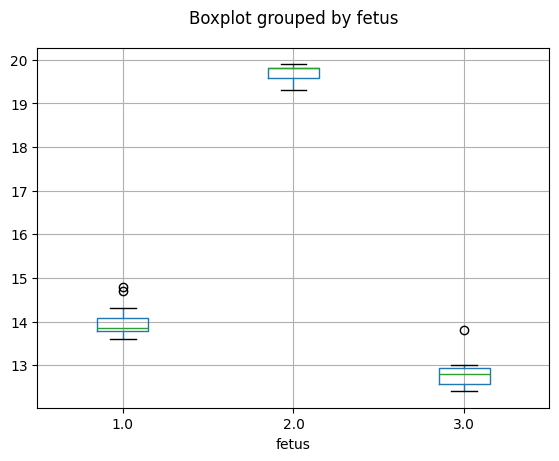

In [ ]:
#[2] 태아별 머리 둘레 plot 만들기
import matplotlib.pyplot as plt
data.boxplot(column = 'head_size',by='fetus',grid=True)
plt.title('')
plt.show()

In [ ]:
#[3] 태아별 머리 둘레 평균을 구하기
data.groupby('fetus')['head_size'].mean()

,head_size
fetus,
1.0,13.991667
2.0,19.691667
3.0,12.825000


* 앞의 그림을 보면
  * 그림에서 태아(fetus) 3명의 머리 둘레는 차이가 있어 보임
  * 관측자와 태아에 상호작용 효과 여부를 Two way ANOVA를 통해 알아볼 수 있음

* 3셋트의 귀무가설/대립가설
  * 귀무가설 : 측정자별 머리둘레 평균은 동일하다
  * 대립가설 : 측정자별 머리둘레 평균은 동일하지 않다 (차이가 있다)
  * 귀무가설 : 태아별 머리둘레 평균은 동일하다
  * 대립가설 : 태아별 머리둘레 평균은 동일하지 않다 (차이가 있다)
  * 귀무가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다 (독립이다,영향을 주지 않는다)
  * 대립가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 있다 (독립이 아니다, 영향을 준다)

In [ ]:
#[4] 이원분산분석
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.stats.anova import anova_lm

#[1] 분산 분석표 반환 - 교호작용 불포함
model1 = ols('head_size ~ C(fetus) + C(observer)',data).fit()
model2 = OLS.from_formula('head_size ~ C(fetus) + C(observer)',data).fit()
result1 = anova_lm(model1)
result2 = anova_lm(model2)
print(result1,result2,sep='\n')

               df      sum_sq     mean_sq            F        PR(>F)
C(fetus)      2.0  324.008889  162.004444  2023.182239  1.006291e-32
C(observer)   3.0    1.198611    0.399537     4.989593  6.316641e-03
Residual     30.0    2.402222    0.080074          NaN           NaN
               df      sum_sq     mean_sq            F        PR(>F)
C(fetus)      2.0  324.008889  162.004444  2023.182239  1.006291e-32
C(observer)   3.0    1.198611    0.399537     4.989593  6.316641e-03
Residual     30.0    2.402222    0.080074          NaN           NaN


In [ ]:
#[1] 분산 분석표 반환 - 교호작용 포함(독립변수끼리 서로 영향을 미치는지, 상호작용)
model = ols('head_size ~ C(fetus)+C(observer)+C(fetus):C(observer)',data).fit()
result = anova_lm(model)
print(result)

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


In [ ]:
# [2] 결정계수
# r2 = SSR/SST
print(type(result))
SST = result['sum_sq'].sum()
SSE = result.loc['Residual','sum_sq']
SSR = SST-SSE
r2 = SSR/SST
print(round(r2,4),round(1-SSE/SST,4))

# [3] mse
mse = result.loc['Residual','mean_sq']
print(round(mse,4))

<class 'pandas.core.frame.DataFrame'>
0.9944 0.9944
0.0767


* C(fetus):C(observer)의 p-value가 0.05이상 입니다
* 따라서 귀무가설을 기각할 수 없고,
머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다.